In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Keras: The high-level API for TensorFlow


Keras is the high-level API of the TensorFlow platform. It provides an approachable, highly-productive interface for solving machine learning (ML) problems, with a focus on modern deep learning. Keras covers every step of the machine learning workflow, from data processing to hyperparameter tuning to deployment. It was developed with a focus on enabling fast experimentation.

With Keras, you have full access to the scalability and cross-platform capabilities of TensorFlow. You can run Keras on a TPU or large clusters of GPUs, and you can export Keras models to run in the browser or on mobile devices. You can also serve Keras models via a web API.

Keras is designed to reduce cognitive load by achieving the following goals:

- Offer simple, consistent interfaces.
- Minimize the number of actions required for common use cases.
- Provide clear, actionable error messages.
- Help you write concise, readable code.


# Keras API components
The core data structures of Keras are <B>layers</b> and <b>models</b>. A <b>layer</b> is a simple input/output transformation, and a model is a <U>directed acyclic graph (DAG)</u> of layers.

<b><u>Layers</u></b>

- The <b>tf.keras.layers.Layer</b> class is the fundamental abstraction in Keras.
- A <b>Layer</b> encapsulates a state (weights) and some computation (defined in the tf.keras.layers.Layer.call method).

- <u>Weights</u> created by layers can be trainable or non-trainable.
- Layers are recursively composable: If you assign a layer instance as an attribute of another layer, the outer layer will start tracking the weights created by the inner layer.
- You can also use layers to handle data preprocessing tasks like normalization and text vectorization. Preprocessing layers can be included directly into a model, either during or after training, which makes the model portable.

<b><u>Models</u></b>
- A <b>model</b> is an object that groups layers together and that can be trained on data.
- The simplest type of model is the <b>Sequential model</b>, which is a linear stack of layers.
- For more complex architectures, you can either use the Keras <b>functional</b> API, which lets you build arbitrary graphs of layers, or use subclassing to write models from scratch.

The tf.keras.Model class features built-in training and evaluation methods:

- <b>tf.keras.Model.fit<b>: Trains the model for a fixed number of epochs.
- <b>tf.keras.Model.predict</b>: Generates output predictions for the input samples.
- <b>tf.keras.Model.evaluate</b>: Returns the loss and metrics values for the model; configured via the tf.keras.Model.compile method.

These methods give you access to the following built-in training features:

<b>Callbacks</b>. You can leverage built-in callbacks for early stopping, model checkpointing, and TensorBoard monitoring. You can also implement custom callbacks.
    
<b>Distributed training</b>. You can easily scale up your training to multiple GPUs, TPUs, or devices.
    
<b>Step fusing</b>. With the steps_per_execution argument in tf.keras.Model.compile, you can process multiple batches in a single tf.function call, which greatly improves device utilization on TPUs.


# Models API
There are three ways to create Keras models:

- The <B>Sequential</B> model, which is very straightforward (a simple list of layers), but is limited to single-input, single-output stacks of layers
- The <B>Functional</B> API, which is an easy-to-use, fully-featured API that supports arbitrary model architectures. For most people and most use cases, this is what you should be using. This is the Keras "industry strength" model.
- <B>Model subclassing</B>, where you implement everything from scratch on your own. Use this if you have complex, out-of-the-box research use cases.

# When to use a Sequential model
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

A Sequential model is not appropriate when:

- Your model has multiple inputs or multiple outputs
- Any of your layers has multiple inputs or multiple outputs
- You need to do layer sharing
- You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [ ]:
#Sample Sequential model
# Define Sequential model with 3 layers
import tensorflow as tf
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)
print(y)

tf.Tensor(
[[ 2.0339282e-03  1.9382723e-02 -4.5759530e-06 -2.0439096e-02]
 [ 2.0339282e-03  1.9382723e-02 -4.5759530e-06 -2.0439096e-02]
 [ 2.0339282e-03  1.9382723e-02 -4.5759530e-06 -2.0439096e-02]], shape=(3, 4), dtype=float32)


In [ ]:
#Another implementation
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))
y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-0.30102524,  0.06280456,  0.4650275 , -0.21964106],
       [-0.30102524,  0.06280456,  0.4650275 , -0.21964106],
       [-0.30102524,  0.06280456,  0.4650275 , -0.21964106]],
      dtype=float32)>

# Creating Sequential Model

In [ ]:
#You can create a Sequential model by passing a list of layers to the Sequential constructor:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

#Its layers are accessible via the layers attribute:
model.layers

 You can also create a Sequential model incrementally via the <b>add()</b> method:

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

The <b>pop()</b> method to remove layers: a Sequential model behaves very much like a list of layers.

In [ ]:
model.pop()
print(len(model.layers))# 2


2


Sequential constructor accepts a name argument, just like any layer or model in Keras.

In [ ]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

# Specifying the input shape in advance
Generally, all layers in Keras need to know the shape of their inputs in order to be able to create their weights.

In [ ]:
#DEFINING THE SHAPE OF THE INPUT AT THE BEGINNING

model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))

model.summary()
#param #: 4*2+2

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2)                 10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Implementing Sequential Model in Classification
As a sample implementation of Sequential model in Keras, we will use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values and is an ideal choice for our first neural network in Keras.

# Step 1. Import libraries and helper modules

In [ ]:
##import libraries
import numpy as np
from numpy import loadtxt

import pandas as pd
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Step 2. Import dataset

In [67]:
from pandas import read_csv
url = "/content/drive/MyDrive/Datasets/pima-indians-diabetes.csv"
names = ['preg' , 'plas' , 'pres' , 'skin' , 'test' , 'mass' , 'pedi' , 'age' , 'class']
data = read_csv(url, names=names)
print(data.shape)
data.head(100)

TypeError: ignored

There are eight input variables and one output variable (the last column). The variables can be summarized as follows:

- Input Variables (X):
    - Number of times pregnant
    - Plasma glucose concentration at 2 hours in an oral glucose tolerance test
    - Diastolic blood pressure (mm Hg)
    - Triceps skin fold thickness (mm)
    - 2-hour serum insulin (mu U/ml)
    - Body mass index (weight in kg/(height in m)^2)
    - Diabetes pedigree function
    - Age (years)
- Output Variables (y): Class variable (0 or 1)

# Step 3. Split the array into input and output components

In [ ]:
array = data.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

# Step 4. Define Keras Model
Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the correct number of input features. This can be specified when creating the first layer with the input_shape argument and setting it to (8,) for presenting the eight input variables as a vector.

In this example, let’s use a fully-connected network structure with three layers.

<b>Fully connected layers</b> are defined using the <b>Dense</b> class. You can specify the <u>number of neurons or nodes</u> in the layer as the first argument and the <u>activation function using the activation argument</u>.

Also, you will use the rectified linear unit activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer.Using a sigmoid on the output layer ensures your network output is between 0 and 1 and is easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

You can piece it all together by adding each layer:

- The model expects rows of data with 8 variables (the input_shape=(8,) argument).
- The first hidden layer has 12 nodes and uses the relu activation function.
- The second hidden layer has 8 nodes and uses the relu activation function.
- The output layer has one node and uses the sigmoid activation function.

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Note:  The shape of the input to the model is defined as an argument on the first hidden layer.
#This means that the line of code that adds the first Dense layer is doing two things, defining the input or visible layer and the first hidden layer.

In [ ]:
#Printing the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 12)                108       
                                                                 
 dense_8 (Dense)             (None, 8)                 104       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Step 5. Compile Keras Model
Now that the model is defined, you can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU, GPU, or even distributed.

When compiling, you must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in your dataset.

You must specify the <u>loss function</u> to use to evaluate a set of weights, the <u>optimizer</u> used to search through different weights for the network, and any optional metrics you want to collect and report during training.

In this case, use <u>cross entropy</u> as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“.

We will define the optimizer as "adam" because it automatically tunes itself and gives good results in a wide range of problems.

Finally, because it is a classification problem, you will collect and report the classification <u>accuracy</u> defined via the metrics argument.

In [ ]:

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Step 6. Fit Keras Model
You have defined your model and compiled it to get ready for efficient computation.

Now it is time to execute the model on some data.

You can train or fit your model on your loaded data by calling the <b>fit()</b> function on the model.

<u>Training occurs over epochs, and each epoch is split into batches</u>.

<b>Epoch</b>: One pass through all of the rows in the training dataset
<b>Batch</b>: One or more samples considered by the model within an epoch before weights are updated.
<u>One epoch comprises one or more batches, based on the chosen batch size, and the model is fit for many epochs</u>.
<b>Batch_size</b>:The number of dataset rows that are considered before the model weights are updated within each epoch.

This problem will run for a small number of epochs (150) and use a relatively small batch size of 10.

These configurations can be chosen experimentally by trial and error. You want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called model <u>convergence</u>.

In [ ]:
# fit the keras model on the dataset without progress bars
model.fit(X, Y, epochs=150, batch_size=10)


Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 2.1512 - accuracy: 0.5299
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.0389 - accuracy: 0.6159
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7811 - accuracy: 0.6602
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.6536
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6536
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6549
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.6641
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6602
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.6758
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.6549
Epoch 11/

# Step 7. Evaluate Keras Model
You have trained our neural network on the entire dataset, and you can evaluate the performance of the network on the same dataset.

This will only give you an idea of how well you have modeled the dataset (e.g., train accuracy), but no idea of how well the algorithm might perform on new data. This was done for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.

You can evaluate your model on your training dataset using the <b>evaluate()</b> function and pass it the same input and output used to train the model.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

The <b>evaluate()</b> function will return a list with two values. The first will be the <u>loss of the model</u> on the dataset, and the second will be the <u>accuracy of the model</u> on the dataset.

In [ ]:
# evaluate the keras model
_,accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7773
Accuracy: 77.73


Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision.

Neural networks are stochastic algorithms, meaning that the same algorithm on the same data can train a different model with different skill each time the code is run.

# Step 8. Make Predictions

You can adapt the trained model and use it to generate predictions on the training dataset, pretending it is a new dataset you have not seen before.

Making predictions is as easy as calling the <b>predict()</b> function on the model. You are using a sigmoid activation function on the output layer, so the predictions will be a probability in the range between 0 and 1. You can easily convert them into a crisp binary prediction for this classification task by rounding them.

In [ ]:
#Alternately, you can convert the probability into 0 or 1 to predict crisp classes directly; for example:

# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
predictions

24/24 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], Y[i]))

24/24 [==============================] - 0s 2ms/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


# CHALLENGE!

Notice that the sample above yields a low accuracy of about 48%. Also the model was applied to the entire dataset without provisioning for training data. The dataset was also not normalized as some of the feature values are of different scale or magnitude.

Your task is to apply changes to the model and add preprocessing steps:

<b>Part 1</b>
1. Split the dataset into training and testing sets.
2. Apply data preprocessing methods to the dataset.
3. Use the same model and find out the effect on its performance (accuracy).

<b>Part 2</b>

Apply the same process in 1 & 2, but this time try to add more hidden layers and increase the number of neurons. Check the effect on the model's performance.

**PART 1**

In [ ]:
from sklearn.model_selection import train_test_split

# Separate array into input and output components
array = data.values
X = array[:,0:8] # input
Y = array[:,8] # output

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

In [ ]:
model = keras.Sequential([
                            layers.Dense(12, input_shape=(8,), activation='relu', name='layer1'),
                            layers.Dense(8, activation='relu', name='layer2'),
                            layers.Dense(1, activation='sigmoid', name='layer3'),
                          ],
                          name='model')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 12)                108       
                                                                 
 layer2 (Dense)              (None, 8)                 104       
                                                                 
 layer3 (Dense)              (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X, Y,
           epochs=150,
           batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 2.7984 - accuracy: 0.5195
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.6318 - accuracy: 0.5482
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 1.1676 - accuracy: 0.5612
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 1.0050 - accuracy: 0.5846
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8923 - accuracy: 0.6159
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8651 - accuracy: 0.6042
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7970 - accuracy: 0.6237
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7964 - accuracy: 0.6016
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7434 - accuracy: 0.6380
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.6250
Epoch 11/

In [ ]:
_,accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 1s 6ms/step - loss: 0.4612 - accuracy: 0.7852
Accuracy: 78.52


**PART 2**

In [ ]:
from sklearn.model_selection import train_test_split

# separate array into input and output components
array = data.values
X = array[:,0:8]
Y = array[:,8]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

In [ ]:
model = keras.Sequential([
                            layers.Dense(20, input_shape=(8,), activation='relu', name='layer1'),
                            layers.Dense(8, activation='relu', name='layer2'),
                            layers.Dense(20, activation='relu', name='layer3'),
                            layers.Dense(8, activation='relu', name='layer4'),
                            layers.Dense(1, activation='sigmoid', name='layer5'),
                          ],
                          name='model')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 20)                180       
                                                                 
 layer2 (Dense)              (None, 8)                 168       
                                                                 
 layer3 (Dense)              (None, 20)                180       
                                                                 
 layer4 (Dense)              (None, 8)                 168       
                                                                 
 layer5 (Dense)              (None, 1)                 9         
                                                                 
Total params: 705 (2.75 KB)
Trainable params: 705 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X, Y,
           epochs=150,
           batch_size=10)

Epoch 1/150
77/77 [==============================] - 2s 2ms/step - loss: 0.7805 - accuracy: 0.6120
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6159
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.6693
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.6367
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.6589
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.6940
Epoch 7/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5951 - accuracy: 0.7174
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7057
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.7135
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7161
Epoch 11/

In [ ]:
_,accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7656
Accuracy: 76.56


# Example of Functional Model Implementation

<b>Use case(Predicting Energy output and exhaust vacuum for a Power Plant)</b>
Let’s apply the functional API to real-world data. We are going to use the combined cycle power plant data set from the UCI machine learning repository. Download the dataset from the below link.

https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant


The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the power plant was set to work with a full load.

A combined-cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has an effect on the Steam Turbine, the other three of the ambient variables affect the GT performance.

Attribute Information(Taken from above link):
Features consist of hourly average ambient variables
– Temperature (T) in the range 1.81°C and 37.11°C.
– Ambient Pressure (AP) in the range 992.89-1033.30 millibar.

– Relative Humidity (RH) in the range 25.56% to 100.16%.
– Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg.
– Net hourly electrical energy output (PE) 420.26-495.76 MW.

# Step 1. Import library and helper modules

In [ ]:
##import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

##Import the libraries for neural networks

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input

from tensorflow.keras.layers import Dense


# Step 2. Import the dataset and define functions to get the output of the model

In [ ]:
##import the dataset

df = pd.read_excel('energy.xlsx')

df.head()

##define a function to get the outputs of the model

def get_outputs(data):

    y1 = data.pop('PE')

    y1 = np.array(y1)

    y2 = data.pop('V')

    y2 = np.array(y2)

    return y1, y2



# Step 3. Split the model into training and testing set

In [ ]:
# Split the data into train and test with 80 train / 20 test

x_train, x_test = train_test_split(df, test_size=0.2, random_state = 1)

##getting the outputs(PE) and (V) of the train and test data

y_train = get_outputs(x_train)

y_test = get_outputs(x_test)



# Step 4. Normalize the dataset with preprocessing techniques

In [ ]:
###Scaling the inputs

min_max=MinMaxScaler()

X_train=min_max.fit_transform(x_train)

X_test=min_max.transform(x_test)
X_test


array([[0.45665722, 0.26354863, 0.82908847],
       [0.41161473, 0.37589706, 0.36514745],
       [0.68441926, 0.36104925, 0.42158177],
       ...,
       [0.25127479, 0.69042316, 0.6269437 ],
       [0.91274788, 0.33655036, 0.3419571 ],
       [0.3815864 , 0.583024  , 0.77091153]])

# Step 5. Build the neural network

In [ ]:
#Here we are using 2 hidden layers and one branched layer with 10 neurons each

##define input layer

input_layer = Input(shape=(3,),name='input_layer')

##Defining 2 hidden layers

Layer_1 = Dense(10, activation="relu",name='Layer_1')(input_layer)

Layer_2 = Dense(10, activation="relu",name='Layer_2')(Layer_1)

##Defining  output layer y1

y1_output= Dense(1, activation="linear",name='y1_output')(Layer_2)

##Defining Branched layer

Branched_layer=Dense(10, activation="relu",name='Branched_layer')(Layer_2)

##Defining 2nd output layer y2

y2_output= Dense(1, activation="linear",name='y2_output')(Branched_layer)

##Defining the model by specifying the input and output layers

model = Model(inputs=input_layer,outputs=[y1_output,y2_output])

In [ ]:
#Printing the summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 3)]                  0         []                            
                                                                                                  
 Layer_1 (Dense)             (None, 10)                   40        ['input_layer[0][0]']         
                                                                                                  
 Layer_2 (Dense)             (None, 10)                   110       ['Layer_1[0][0]']             
                                                                                                  
 Branched_layer (Dense)      (None, 10)                   110       ['Layer_2[0][0]']             
                                                                                              

# Step 6. Define neural network hyperparameters (Optimizers and Activation Functions) and compile the model

In [ ]:
## defining the optimiser and loss function

model.compile(optimizer='adam',

              loss={'y1_output':'mse','y2_output':'mse'})

# Step 7. Train the model

In [ ]:
##training the model

model.fit(X_train,y_train,

               epochs=100, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/100
60/60 [==============================] - 2s 10ms/step - loss: 209598.2031 - y1_output_loss: 206506.2188 - y2_output_loss: 3091.9966 - val_loss: 209356.7500 - val_y1_output_loss: 206303.8125 - val_y2_output_loss: 3052.9280
Epoch 2/100
60/60 [==============================] - 0s 5ms/step - loss: 208907.2344 - y1_output_loss: 205911.0312 - y2_output_loss: 2996.1389 - val_loss: 208306.9375 - val_y1_output_loss: 205414.4844 - val_y2_output_loss: 2892.4392
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 207066.0625 - y1_output_loss: 204397.5938 - y2_output_loss: 2668.4788 - val_loss: 205360.2344 - val_y1_output_loss: 203047.3906 - val_y2_output_loss: 2312.8179
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 202571.1875 - y1_output_loss: 200831.4375 - y2_output_loss: 1739.7609 - val_loss: 199097.0625 - val_y1_output_loss: 198053.1875 - val_y2_output_loss: 1043.8752
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - 

# Step 8. Predict model performance

60/60 [==============================] - 0s 2ms/step


Text(0, 0.5, 'predicted energy output')

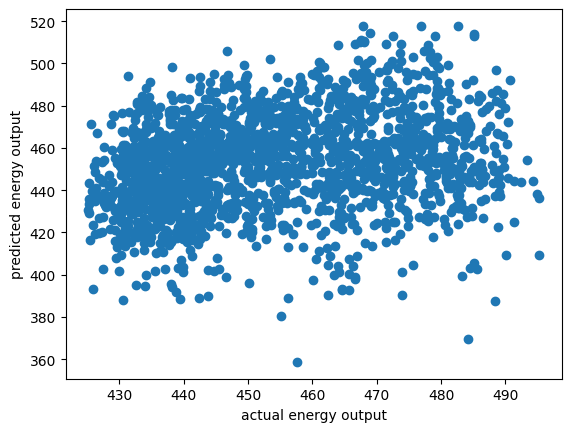

In [ ]:
#Now let’s predict energy output and exhaust vacuum on the test data and check the performance

##model predictions

predictions = model.predict(X_test)

predicted_energy=predictions[0]

predicted_vacuum=predictions[1]
##Plotting actual vs predicted energy

plt.scatter(y_test[0],predicted_energy)

plt.xlabel('actual energy output')

plt.ylabel('predicted energy output')

Text(0, 0.5, 'predicted exhaust vacuum')

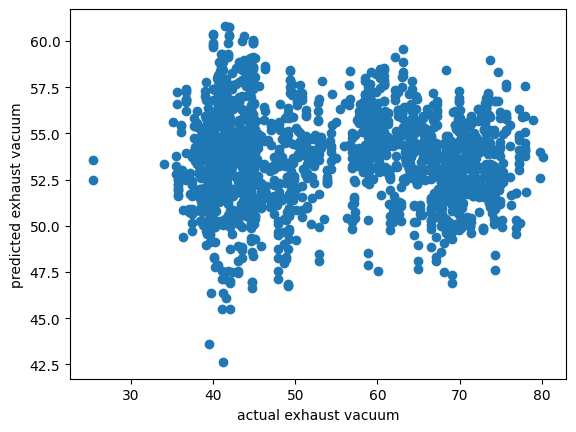

In [ ]:
##Plotting actual vs predicted exhaust vacuum

plt.scatter(y_test[1],predicted_vacuum)

plt.xlabel('actual exhaust vacuum')

plt.ylabel('predicted exhaust vacuum')

In [ ]:
#Looks like our model is doing better in predicting the energy output than predicting the exhaust vacuum.

#Checking r2 score:
from sklearn.metrics import r2_score


print('r2 score for energy predicted :',r2_score(y_test[0],predicted_energy))

print('r2 score forexhaust vacuum predicted :',r2_score(y_test[1],predicted_vacuum))

r2 score for energy predicted : -1.0637638691431555
r2 score forexhaust vacuum predicted : -0.0587850350947805


# Conclusion
Although the functional API offers more flexibility and control over the layers than the sequential API, the sequential model is easier to use however it can only be applied to single-input, single-output stacks of layers

For functional API, it can be used to predict multiple outputs(i.e output layers) with multiple inputs(i.e input layers))